In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# from http://www.ebi.ac.uk/Tools/webservices/psicquic/mint/webservices/current/search/query/species:yeast

yeast_intra = pd.read_csv('data/species_yeast.txt', sep='\t', header=None);
yeast_intra

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,uniprotkb:E9P8I0,uniprotkb:E9P8I0,intact:EBI-8509988|intact:MINT-8043936,intact:EBI-8509988|intact:MINT-8043936,psi-mi:e9p8i0_yeasx(display_long)|uniprotkb:UR...,psi-mi:e9p8i0_yeasx(display_long)|uniprotkb:UR...,"psi-mi:""MI:0030""(cross-linking study)",Redeker et al. (2010),mint:MINT-8043931|pubmed:21078122|imex:IM-1567...,"taxid:4932(yeasx)|taxid:4932(""Saccharomyces ce...","taxid:4932(yeasx)|taxid:4932(""Saccharomyces ce...","psi-mi:""MI:0407""(direct interaction)","psi-mi:""MI:0471""(MINT)",intact:EBI-8510069|mint:MINT-8044534|imex:IM-1...,intact-miscore:0.44
1,uniprotkb:P0CY12,uniprotkb:P0CY10,intact:EBI-8492802|intact:MINT-507217|uniprotk...,intact:EBI-8492819|uniprotkb:Q06724|uniprotkb:...,psi-mi:mata2_yeasx(display_long)|uniprotkb:MAT...,psi-mi:mata1_yeasx(display_long)|uniprotkb:MAT...,"psi-mi:""MI:0114""(x-ray crystallography)",Ke et al. (2002),pubmed:12121651|mint:MINT-5215552,"taxid:4932(yeasx)|taxid:4932(""Saccharomyces ce...","taxid:4932(yeasx)|taxid:4932(""Saccharomyces ce...","psi-mi:""MI:0407""(direct interaction)","psi-mi:""MI:0471""(MINT)",intact:EBI-8492798|mint:MINT-24767,intact-miscore:0.44
2,uniprotkb:P0CD92,uniprotkb:P49018,intact:EBI-2743|uniprotkb:O74680|uniprotkb:P53386,intact:EBI-7822|uniprotkb:D6VSW3,psi-mi:aqy1_yeasx(display_long)|uniprotkb:AQY1...,psi-mi:gpi8_yeast(display_long)|uniprotkb:D979...,"psi-mi:""MI:0112""(ubiquitin reconstruction)",Miller et al. (2005),pubmed:16093310|mint:MINT-5217891|imex:IM-27289,"taxid:4932(yeasx)|taxid:4932(""Saccharomyces ce...",taxid:559292(yeast)|taxid:559292(Saccharomyces...,"psi-mi:""MI:0915""(physical association)","psi-mi:""MI:0471""(MINT)",intact:EBI-7740642|mint:MINT-69274|imex:IM-272...,intact-miscore:0.37
3,uniprotkb:P0CD92,uniprotkb:P43542,intact:EBI-2743|uniprotkb:O74680|uniprotkb:P53386,intact:EBI-2050225|uniprotkb:D6VTG8,psi-mi:aqy1_yeasx(display_long)|uniprotkb:AQY1...,psi-mi:cos4_yeast(display_long)|uniprotkb:YFL0...,"psi-mi:""MI:0112""(ubiquitin reconstruction)",Miller et al. (2005),pubmed:16093310|mint:MINT-5217891|imex:IM-27289,"taxid:4932(yeasx)|taxid:4932(""Saccharomyces ce...",taxid:559292(yeast)|taxid:559292(Saccharomyces...,"psi-mi:""MI:0915""(physical association)","psi-mi:""MI:0471""(MINT)",intact:EBI-7740658|mint:MINT-69477|imex:IM-272...,intact-miscore:0.37
4,uniprotkb:P0CI38,uniprotkb:Q12328,intact:EBI-20756|uniprotkb:P39546|uniprotkb:Q7...,intact:EBI-9132|uniprotkb:D6VRD7,psi-mi:yaj3_yeasx(display_long),psi-mi:tim22_yeast(display_long)|uniprotkb:D08...,"psi-mi:""MI:0112""(ubiquitin reconstruction)",Miller et al. (2005),pubmed:16093310|mint:MINT-5217891|imex:IM-27289,"taxid:4932(yeasx)|taxid:4932(""Saccharomyces ce...",taxid:559292(yeast)|taxid:559292(Saccharomyces...,"psi-mi:""MI:0915""(physical association)","psi-mi:""MI:0471""(MINT)",intact:EBI-7741685|mint:MINT-68878|imex:IM-272...,intact-miscore:0.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42345,uniprotkb:O43091,uniprotkb:P0AD57,intact:EBI-7701164|uniprotkb:Q96WV7|uniprotkb:...,intact:EBI-1131851|uniprotkb:P19641|uniprotkb:...,psi-mi:dps1_schpo(display_long)|uniprotkb:dps1...,psi-mi:ispb_ecoli(display_long)|uniprotkb:All-...,"psi-mi:""MI:0096""(pull down)",Cui et al. (2010),pubmed:20051244|imex:IM-15459|mint:MINT-738499...,"taxid:284812(schpo)|taxid:284812(""Schizosaccha...","taxid:83333(ecoli)|taxid:83333(""Escherichia co...","psi-mi:""MI:0915""(physical association)","psi-mi:""MI:0471""(MINT)",intact:EBI-7701193|mint:MINT-7385024|imex:IM-1...,intact-miscore:0.52
42346,uniprotkb:O13851,uniprotkb:P0AD57,intact:EBI-7701234|intact:MINT-4668501,intact:EBI-1131851|uniprotkb:P19641|uniprotkb:...,psi-mi:dlp1_schpo(display_long)|uniprotkb:dlp1...,psi-mi:ispb_ecoli(display_long)|uniprotkb:All-...,"psi-mi:""MI:0096""(pull down)",Cui et al. (2010),pubmed:20051244|imex:IM-15459|mint:MINT-738499...,"taxid:284812(schpo)|taxid:284812(""Schizosaccha...","taxid:83333(ecoli)|taxid:83333(""Escherichia co...","psi-mi:""MI:0915""(physical

## Load PFAM domains for yeast

In [3]:
import re

# http://pfam.xfam.org/proteome/559292#tabview=tab2
# load in header row as single string # names are between angle brackets
yeast_pfam_header = re.findall(r'<(.*?)>', pd.read_csv('data/pfam_yeast_domains.tsv', sep='\n', header=2).columns[0]);

yeast_pfam_header

['seq id',
 'alignment start',
 'alignment end',
 'envelope start',
 'envelope end',
 'hmm acc',
 'hmm name',
 'type',
 'hmm start',
 'hmm end',
 'hmm length',
 'bit score',
 'E-value',
 'clan']

In [4]:
yeast_pfam = pd.read_csv('data/pfam_yeast_domains.tsv', sep='\t', names=yeast_pfam_header);

In [5]:
yeast_pfam.head()

,seq id,alignment start,alignment end,envelope start,envelope end,hmm acc,hmm name,type,hmm start,hmm end,hmm length,bit score,E-value,clan
0,#Pfam-A regions from Pfam version 33.1 for ncb...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,#Total number of proteins in proteome: 6048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,#<seq id> <alignment start> <alignment end> <e...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A0A0B7P3V8,621.0,721.0,620.0,724.0,PF00665,rve,Domain,2.0,99.0,102.0,52.0,1.800000e-10,CL0219
4,A2P2R3,79.0,204.0,54.0,215.0,PF13522,GATase_6,Domain,10.0,121.0,132.0,54.7,3.000000e-11,CL0052


In [6]:
yeast_pfam = yeast_pfam.drop(range(3)).reset_index(drop=True)
yeast_pfam.head(20)

,seq id,alignment start,alignment end,envelope start,envelope end,hmm acc,hmm name,type,hmm start,hmm end,hmm length,bit score,E-value,clan
0,A0A0B7P3V8,621.0,721.0,620.0,724.0,PF00665,rve,Domain,2.0,99.0,102.0,52.0,1.800000e-10,CL0219
1,A2P2R3,79.0,204.0,54.0,215.0,PF13522,GATase_6,Domain,10.0,121.0,132.0,54.7,3.000000e-11,CL0052
2,D6VPM8,24.0,117.0,14.0,120.0,PF00674,DUP,Family,9.0,100.0,103.0,115.8,2.200000e-30,No_clan
3,D6VTK4,17.0,296.0,17.0,297.0,PF02116,STE2,Family,1.0,279.0,280.0,304.9,1.300000e-87,No_clan
4,D6W196,231.0,335.0,225.0,337.0,PF00153,Mito_carr,Family,9.0,95.0,97.0,64.3,2.000000e-14,No_clan
5,D6W196,345.0,402.0,343.0,436.0,PF00153,Mito_carr,Family,3.0,60.0,97.0,32.7,1.400000e-04,No_clan
6,D6W196,89.0,107.0,87.0,110.0,PF13202,EF-hand_5,Domain,5.0,23.0,25.0,17.4,5.700000e+00,CL0220
7,D6W196,17.0,78.0,13.0,79.0,PF13499,EF-hand_7,Domain,5.0,69.0,70.0,35.0,3.700000e-05,CL0220
8,O13297,279.0,497.0,278.0,497.0,PF02940,mRNA_triPase,Domain,2.0,221.0,221.0,253.8,3.500000e-72,CL0273
9,O13516,107.0,150.0,107.0,153.0,PF01479,S4,Domain,1.0,44.0,48.0,45.8,9.500000e-09,CL0492


In [7]:
yeast_pfam.shape

(7907, 14)

In [8]:
yeast_pfam['seq id'].unique().size

4930

In [9]:
yeast_pfam['type'].unique()

array(['Domain', 'Family', 'Coiled-coil', 'Repeat', 'Motif', 'Disordered'],
      dtype=object)

In [10]:
yeast_pfam_domains = yeast_pfam[yeast_pfam['type'] == 'Domain'].sort_values('seq id')
# yeast_pfam_domains = yeast_pfam
yeast_pfam_domains

,seq id,alignment start,alignment end,envelope start,envelope end,hmm acc,hmm name,type,hmm start,hmm end,hmm length,bit score,E-value,clan
0,A0A0B7P3V8,621.0,721.0,620.0,724.0,PF00665,rve,Domain,2.0,99.0,102.0,52.0,1.800000e-10,CL0219
1,A2P2R3,79.0,204.0,54.0,215.0,PF13522,GATase_6,Domain,10.0,121.0,132.0,54.7,3.000000e-11,CL0052
6,D6W196,89.0,107.0,87.0,110.0,PF13202,EF-hand_5,Domain,5.0,23.0,25.0,17.4,5.700000e+00,CL0220
7,D6W196,17.0,78.0,13.0,79.0,PF13499,EF-hand_7,Domain,5.0,69.0,70.0,35.0,3.700000e-05,CL0220
8,O13297,279.0,497.0,278.0,497.0,PF02940,mRNA_triPase,Domain,2.0,221.0,221.0,253.8,3.500000e-72,CL0273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7893,Q99383,162.0,223.0,161.0,229.0,PF00076,RRM_1,Domain,2.0,64.0,70.0,60.8,2.200000e-13,CL0221
7902,Q9ZZW7,269.0,367.0,268.0,369.0,PF00961,LAGLIDADG_1,Domain,2.0,100.0,102.0,77.7,2.800000e-18,CL0324
7903,Q9ZZW7,405.0,499.0,405.0,501.0,PF00961,LAGLIDADG_1,Domain,1.0,100.0,102.0,40.8,8.900000e-07,CL0324
7901,Q9ZZW7,18.0,199.0,17.0,208.0,PF00033,Cytochrome_B,Domain,2.0,183.0,189.0,198.7,2.100000e-55,CL0328


In [11]:
yeast_pfam_domains.reset_index(drop=True, inplace=True)
yeast_pfam_domains

,seq id,alignment start,alignment end,envelope start,envelope end,hmm acc,hmm name,type,hmm start,hmm end,hmm length,bit score,E-value,clan
0,A0A0B7P3V8,621.0,721.0,620.0,724.0,PF00665,rve,Domain,2.0,99.0,102.0,52.0,1.800000e-10,CL0219
1,A2P2R3,79.0,204.0,54.0,215.0,PF13522,GATase_6,Domain,10.0,121.0,132.0,54.7,3.000000e-11,CL0052
2,D6W196,89.0,107.0,87.0,110.0,PF13202,EF-hand_5,Domain,5.0,23.0,25.0,17.4,5.700000e+00,CL0220
3,D6W196,17.0,78.0,13.0,79.0,PF13499,EF-hand_7,Domain,5.0,69.0,70.0,35.0,3.700000e-05,CL0220
4,O13297,279.0,497.0,278.0,497.0,PF02940,mRNA_triPase,Domain,2.0,221.0,221.0,253.8,3.500000e-72,CL0273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3873,Q99383,162.0,223.0,161.0,229.0,PF00076,RRM_1,Domain,2.0,64.0,70.0,60.8,2.200000e-13,CL0221
3874,Q9ZZW7,269.0,367.0,268.0,369.0,PF00961,LAGLIDADG_1,Domain,2.0,100.0,102.0,77.7,2.800000e-18,CL0324
3875,Q9ZZW7,405.0,499.0,405.0,501.0,PF00961,LAGLIDADG_1,Domain,1.0,100.0,102.0,40.8,8.900000e-07,CL0324
3876,Q9ZZW7,18.0,199.0,17.0,208.0,PF00033,Cytochrome_B,Domain,2.0,183.0,189.0,198.7,2.100000e-55,CL0328


In [12]:
yeast_pfam_domains['seq id'].unique().size

2599

In [13]:
yeast_pfam_indices = pd.Series(index=yeast_pfam_domains['seq id'].unique(), dtype=object)
# yeast_pfam_indices = pd.DataFrame(index=yeast_pfam_domains['seq id'].unique(), columns=['indices'])
# yeast_pfam_indices['indices'] = [[] for _ in range(yeast_pfam_indices.shape[0])]
yeast_pfam_indices

A0A0B7P3V8    NaN
A2P2R3        NaN
D6W196        NaN
O13297        NaN
O13516        NaN
             ... 
Q99359        NaN
Q99369        NaN
Q99383        NaN
Q9ZZW7        NaN
Q9ZZX0        NaN
Length: 2599, dtype: object

In [14]:
print(type(yeast_pfam_indices.index[0]))
for idx in yeast_pfam_indices.index:
    yeast_pfam_indices.loc[idx] = yeast_pfam_domains['seq id'][yeast_pfam_domains['seq id'] == idx].index

<class 'str'>


In [15]:
yeast_pfam_indices

A0A0B7P3V8                   Int64Index([0], dtype='int64')
A2P2R3                       Int64Index([1], dtype='int64')
D6W196                    Int64Index([2, 3], dtype='int64')
O13297                       Int64Index([4], dtype='int64')
O13516                       Int64Index([5], dtype='int64')
                                  ...                      
Q99359                    Int64Index([3870], dtype='int64')
Q99369                    Int64Index([3871], dtype='int64')
Q99383              Int64Index([3872, 3873], dtype='int64')
Q9ZZW7        Int64Index([3874, 3875, 3876], dtype='int64')
Q9ZZX0                    Int64Index([3877], dtype='int64')
Length: 2599, dtype: object

In [16]:
yeast_pfam_domains.loc[yeast_pfam_indices.iloc[0]]

,seq id,alignment start,alignment end,envelope start,envelope end,hmm acc,hmm name,type,hmm start,hmm end,hmm length,bit score,E-value,clan
0,A0A0B7P3V8,621.0,721.0,620.0,724.0,PF00665,rve,Domain,2.0,99.0,102.0,52.0,1.800000e-10,CL0219


In [17]:
# http://pfam.xfam.org/protein/TUP1_YEAST
'P16649' in yeast_pfam_domains['seq id'].to_list()

True

In [18]:
yeast_pfam_domains.loc[yeast_pfam_indices['P16649']]

,seq id,alignment start,alignment end,envelope start,envelope end,hmm acc,hmm name,type,hmm start,hmm end,hmm length,bit score,E-value,clan
611,P16649,11.0,88.0,11.0,88.0,PF08581,Tup_N,Domain,1.0,77.0,77.0,98.6,4.800000e-25,No_clan


In [19]:
# http://pfam.xfam.org/protein/CDC4_YEAST
yeast_pfam_domains.loc[yeast_pfam_domains['seq id']=='P07834']

,seq id,alignment start,alignment end,envelope start,envelope end,hmm acc,hmm name,type,hmm start,hmm end,hmm length,bit score,E-value,clan
277,P07834,275.0,312.0,273.0,320.0,PF00646,F-box,Domain,3.0,40.0,48.0,20.9,6.200000e-01,CL0271
278,P07834,227.0,272.0,224.0,272.0,PF16856,CDC4_D,Domain,6.0,51.0,51.0,65.5,7.400000e-15,No_clan


In [20]:
'PF00400' in yeast_pfam_domains['hmm acc'].to_list()

False

For some reason WD40 isn't in the downloaded data

In [21]:
# http://pfam.xfam.org/protein/MSI1_YEAST
'P13712' in yeast_pfam_domains['seq id'].to_list()

False

In [22]:
'PF12265' in yeast_pfam_domains['hmm acc']

False

Nor are some proteins

## Load BioGRID Interactome for yeast

In [23]:
# downloaded from https://downloads.thebiogrid.org/File/BioGRID/Release-Archive/BIOGRID-4.2.191/BIOGRID-ORGANISM-4.2.191.tab3.zip

yeast_df = pd.read_csv("data/BIOGRID-ORGANISM-Saccharomyces_cerevisiae_S288c-4.2.191.tab3.txt",
                        sep = "\t")

C:\Users\mawil\Anaconda3\envs\SYSC4907\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (1,2,18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [24]:
yeast_df.shape

(756225, 37)

In [25]:
yeast_df.head()

,#BioGRID Interaction ID,Entrez Gene Interactor A,Entrez Gene Interactor B,BioGRID ID Interactor A,BioGRID ID Interactor B,Systematic Name Interactor A,Systematic Name Interactor B,Official Symbol Interactor A,Official Symbol Interactor B,Synonyms Interactor A,...,TREMBL Accessions Interactor B,REFSEQ Accessions Interactor B,Ontology Term IDs,Ontology Term Names,Ontology Term Categories,Ontology Term Qualifier IDs,Ontology Term Qualifier Names,Ontology Term Types,Organism Name Interactor A,Organism Name Interactor B
0,68770,851136,854020,31676,34272,YLR418C,YOL145C,CDC73,CTR9,L000002792,...,-,NP_014496,-,-,-,-,-,-,Saccharomyces cerevisiae (S288c),Saccharomyces cerevisiae (S288c)
1,68771,854020,851136,34272,31676,YOL145C,YLR418C,CTR9,CDC73,CDP1|L000003477,...,-,NP_013522,-,-,-,-,-,-,Saccharomyces cerevisiae (S288c),Saccharomyces cerevisiae (S288c)
2,68774,851136,854290,31676,34518,YLR418C,YOR123C,CDC73,LEO1,L000002792,...,-,NP_014766,-,-,-,-,-,-,Saccharomyces cerevisiae (S288c),Saccharomyces cerevisiae (S288c)
3,68775,854290,851136,34518,31676,YOR123C,YLR418C,LEO1,CDC73,L000000936,...,-,NP_013522,-,-,-,-,-,-,Saccharomyces cerevisiae (S288c),Saccharomyces cerevisiae (S288c)
4,68778,851136,852582,31676,32973,YLR418C,YBR279W,CDC73,PAF1,L000002792,...,-,NP_009838,-,-,-,-,-,-,Saccharomyces cerevisiae (S288c),Saccharomyces cerevisiae (S288c)


In [26]:
yeast_df['SWISS-PROT Accessions Interactor A'] = yeast_df['SWISS-PROT Accessions Interactor A'].apply(lambda s: s.split('|'))
yeast_df['SWISS-PROT Accessions Interactor B'] = yeast_df['SWISS-PROT Accessions Interactor B'].apply(lambda s: s.split('|'))
yeast_df = yeast_df.explode('SWISS-PROT Accessions Interactor A', ignore_index=True).explode('SWISS-PROT Accessions Interactor B', ignore_index=True)

In [27]:
yeast_df.shape

(769110, 37)

In [28]:
yeast_df.drop(yeast_df[yeast_df['SWISS-PROT Accessions Interactor A'] == '-'].index, inplace=True)
yeast_df.drop(yeast_df[yeast_df['SWISS-PROT Accessions Interactor B'] == '-'].index, inplace=True)
yeast_df.shape

(766596, 37)

In [29]:
yeast_df.columns

Index(['#BioGRID Interaction ID', 'Entrez Gene Interactor A',
       'Entrez Gene Interactor B', 'BioGRID ID Interactor A',
       'BioGRID ID Interactor B', 'Systematic Name Interactor A',
       'Systematic Name Interactor B', 'Official Symbol Interactor A',
       'Official Symbol Interactor B', 'Synonyms Interactor A',
       'Synonyms Interactor B', 'Experimental System',
       'Experimental System Type', 'Author', 'Publication Source',
       'Organism ID Interactor A', 'Organism ID Interactor B', 'Throughput',
       'Score', 'Modification', 'Qualifications', 'Tags', 'Source Database',
       'SWISS-PROT Accessions Interactor A', 'TREMBL Accessions Interactor A',
       'REFSEQ Accessions Interactor A', 'SWISS-PROT Accessions Interactor B',
       'TREMBL Accessions Interactor B', 'REFSEQ Accessions Interactor B',
       'Ontology Term IDs', 'Ontology Term Names', 'Ontology Term Categories',
       'Ontology Term Qualifier IDs', 'Ontology Term Qualifier Names',
       'Ontology

In [30]:
yeast_df.iloc[0]

#BioGRID Interaction ID                                          68770
Entrez Gene Interactor A                                        851136
Entrez Gene Interactor B                                        854020
BioGRID ID Interactor A                                          31676
BioGRID ID Interactor B                                          34272
Systematic Name Interactor A                                   YLR418C
Systematic Name Interactor B                                   YOL145C
Official Symbol Interactor A                                     CDC73
Official Symbol Interactor B                                      CTR9
Synonyms Interactor A                                       L000002792
Synonyms Interactor B                                  CDP1|L000003477
Experimental System                                Affinity Capture-MS
Experimental System Type                                      physical
Author                                                Krogan NJ (2004)
Public

## Load domain-domain interactinos

In [31]:
# from https://3did.irbbarcelona.org/download.php
yeast_3DID = pd.read_csv("data/3did_flat_Apr_10_2020.dat",
                        sep = "\t", header = None,
                        names=range(7))

In [32]:
yeast_3DID.head()

,0,1,2,3,4,5,6
0,#=ID,1-cysPrx_C,1-cysPrx_C,(PF10417.9@Pfam,PF10417.9@Pfam),NaN,NaN
1,#=3D,5jcg,A:157-192,H:157-192,1.1,1.50646,2:2
2,Q,E,159,162,sm,NaN,NaN
3,Q,T,159,163,sm,NaN,NaN
4,E,Q,162,159,ms,NaN,NaN


In [33]:
# this is a flat database; find indices with #=ID, that's what we're interested in (domain domain pairs)
id_indices_3did = yeast_3DID[0].loc[yeast_3DID[0] == '#=ID'].index
id_indices_3did

Int64Index([       0,      489,    17346,    17505,    17551,    17560,
               24675,    24777,    25600,    25610,
            ...
            21980373, 21981657, 21981733, 21981833, 21981862, 21982157,
            21982178, 21983337, 21983498, 21983742],
           dtype='int64', length=14278)

In [34]:
# strip all that are not those indices in non-pfam columns
yeast_3DID_pfam = yeast_3DID[[3,4]].iloc[id_indices_3did]
yeast_3DID_pfam

,3,4
0,(PF10417.9@Pfam,PF10417.9@Pfam)
489,(PF10417.9@Pfam,PF00578.21@Pfam)
17346,(PF10417.9@Pfam,PF02195.18@Pfam)
17505,(PF10417.9@Pfam,PF00085.20@Pfam)
17551,(PF12574.8@Pfam,PF12574.8@Pfam)
...,...,...
21982157,(PF05707.12@Pfam,PF05707.12@Pfam)
21982178,(PF16916.5@Pfam,PF16916.5@Pfam)
21983337,(PF00791.20@Pfam,PF00791.20@Pfam)
21983498,(PF09817.9@Pfam,PF09817.9@Pfam)


In [35]:
# Reformat so it's just pfam IDs
yeast_3DID_pfam.columns=["Pfam ID A","Pfam ID B"]
yeast_3DID_pfam.reset_index(inplace=True, drop=True)

import re
# yeast_3DID_pfam['Pfam ID A'] = yeast_3DID_pfam['Pfam ID A'].apply(lambda x: x.strip('@Pfam'))
# yeast_3DID_pfam['Pfam ID A'] = yeast_3DID_pfam['Pfam ID A'].apply(lambda x: x.strip('('))
yeast_3DID_pfam['Pfam ID A'] = yeast_3DID_pfam['Pfam ID A'].apply(lambda x: re.findall(r'\((.+?)\.', x)[0])
yeast_3DID_pfam['Pfam ID B'] = yeast_3DID_pfam['Pfam ID B'].apply(lambda x: re.findall(r'.*(?=\.)', x)[0])

yeast_3DID_pfam.head()

,Pfam ID A,Pfam ID B
0,PF10417,PF10417
1,PF10417,PF00578
2,PF10417,PF02195
3,PF10417,PF00085
4,PF12574,PF12574


In [36]:
yeast_3DID_pfam

,Pfam ID A,Pfam ID B
0,PF10417,PF10417
1,PF10417,PF00578
2,PF10417,PF02195
3,PF10417,PF00085
4,PF12574,PF12574
...,...,...
14273,PF05707,PF05707
14274,PF16916,PF16916
14275,PF00791,PF00791
14276,PF09817,PF09817


In [37]:
yeast_3DID_pfam['Pfam ID A'].unique().size

7173

In [38]:
yeast_3DID_pfam['Pfam ID B'].unique().size

7167

In [39]:
yeast_3DID_pfam[yeast_3DID_pfam['Pfam ID A'] == yeast_3DID_pfam['Pfam ID B'].iloc[1]]

,Pfam ID A,Pfam ID B
749,PF00578,PF00578
750,PF00578,PF00881
751,PF00578,PF02195
752,PF00578,PF00085
753,PF00578,PF17991
754,PF00578,PF13905


In [40]:
yeast_3DID_pfam[yeast_3DID_pfam['Pfam ID B'] == yeast_3DID_pfam['Pfam ID B'].iloc[1]]

,Pfam ID A,Pfam ID B
1,PF10417,PF00578
749,PF00578,PF00578


## Create dictionary of domain pairs

In [41]:
pfam_pairs = pd.DataFrame(index=pd.concat([yeast_3DID_pfam['Pfam ID A'], yeast_3DID_pfam['Pfam ID B']]).unique(), columns=['pair values'])

In [42]:
pfam_pairs['pair values'] = [[] for _ in range(pfam_pairs.shape[0])]

In [43]:
pfam_pairs

,pair values
PF10417,[]
PF12574,[]
PF00244,[]
PF00389,[]
PF02826,[]
...,...
PF13894,[]
PF18366,[]
PF14835,[]
PF18586,[]


In [44]:

for A, B in zip(yeast_3DID_pfam['Pfam ID A'], yeast_3DID_pfam['Pfam ID B']):
    if B not in pfam_pairs['pair values'].loc[A]:
        pfam_pairs['pair values'].loc[A].append(B)

In [45]:
pfam_pairs

,pair values
PF10417,"[PF10417, PF00578, PF02195, PF00085]"
PF12574,[PF12574]
PF00244,"[PF00244, PF00583, PF03496, PF00130, PF00525, ..."
PF00389,"[PF00389, PF01842, PF11890]"
PF02826,"[PF02826, PF02222, PF17769]"
...,...
PF13894,[]
PF18366,[]
PF14835,[]
PF18586,[]


In [46]:
for A, B in zip(yeast_3DID_pfam['Pfam ID A'], yeast_3DID_pfam['Pfam ID B']):
    if A not in pfam_pairs['pair values'].loc[B]:
        pfam_pairs['pair values'].loc[B].append(A)

In [47]:
pfam_pairs

,pair values
PF10417,"[PF10417, PF00578, PF02195, PF00085]"
PF12574,[PF12574]
PF00244,"[PF00244, PF00583, PF03496, PF00130, PF00525, ..."
PF00389,"[PF00389, PF01842, PF11890]"
PF02826,"[PF02826, PF02222, PF17769]"
...,...
PF13894,[PF00096]
PF18366,[PF00096]
PF14835,[PF00097]
PF18586,[PF18585]


In [48]:
yeast_3DID_pfam[yeast_3DID_pfam['Pfam ID B'] == 'PF17979']

,Pfam ID A,Pfam ID B
14231,PF10283,PF17979


In [49]:
pfam_pairs.loc['PF10283']

pair values    [PF17979]
Name: PF10283, dtype: object

## Find indices of sites for pairs

In [50]:
# PA, PB = yeast_df['SWISS-PROT Accessions Interactor A'].loc[0], yeast_df['SWISS-PROT Accessions Interactor B'].loc[0]
# PA, PB

In [51]:
# pfam_id_A = yeast_pfam_domains['hmm acc'].loc[yeast_pfam_indices.loc[PA]]
# pfam_id_A

In [52]:
# pfam_id_B = yeast_pfam_domains['hmm acc'].loc[yeast_pfam_indices.loc[PB]]
# pfam_id_B

In [53]:
# pfam_pairs['pair values'].loc[pfam_id_A]

In [54]:
# pfam_pairs['pair values'].loc[pfam_id_A]

In [55]:
# yeast_3DID_pfam.loc[yeast_3DID_pfam['Pfam ID A'] == 'PF05179']

In [56]:
# yeast_3DID_pfam.loc[yeast_3DID_pfam['Pfam ID B'] == 'PF05179']

In [57]:
# yeast_3DID_pfam.loc[yeast_3DID_pfam['Pfam ID B'] == 'PF13176']

In [58]:
# yeast_3DID_pfam.loc[yeast_3DID_pfam['Pfam ID A'] == 'PF13176']

In [59]:
# pfam_pairs['pair values'].loc['PF10471']

In [60]:
# for a,b in yeast_pfam_domains['hmm acc'].loc[yeast_pfam_indices.loc[PA]].iteritems():
#     print((yeast_pfam_domains['envelope start'].loc[a]))
    
# yeast_pfam_domains['hmm acc'].loc[yeast_pfam_indices.loc[PA]]

In [61]:
# try:
#     pfam_pairs['pair values'].loc['PF13907']
# except KeyError as inst:
#     print("No pairs found for domain " + inst.args[0])

In [62]:
yeast_df['domain_a'] = [[] for _ in range(yeast_df.shape[0])]
yeast_df['domain_b'] = [[] for _ in range(yeast_df.shape[0])]
yeast_df['domain_seq_a'] = [[] for _ in range(yeast_df.shape[0])]
yeast_df['domain_seq_b'] = [[] for _ in range(yeast_df.shape[0])]

In [63]:
yeast_pfam_domains['envelope start'] = yeast_pfam_domains['envelope start'].round(0).astype(np.int)
yeast_pfam_domains['envelope end'] = yeast_pfam_domains['envelope end'].round(0).astype(np.int)
yeast_pfam_domains['envelope start'], yeast_pfam_domains['envelope end']

(0       620
 1        54
 2        87
 3        13
 4       278
        ... 
 3873    161
 3874    268
 3875    405
 3876     17
 3877    201
 Name: envelope start, Length: 3878, dtype: int32,
 0       724
 1       215
 2       110
 3        79
 4       497
        ... 
 3873    229
 3874    369
 3875    501
 3876    208
 3877    300
 Name: envelope end, Length: 3878, dtype: int32)

In [64]:
# pa = yeast_df['SWISS-PROT Accessions Interactor A'][1]
# abc = yeast_pfam_indices.loc[pa]
# pfam_ids_A = yeast_pfam_domains['hmm acc'].loc[abc]

In [65]:
total_domains_found = 0
total_found = 0

for PA, PB, DA, DB, DSA, DSB in zip(yeast_df['SWISS-PROT Accessions Interactor A'], yeast_df['SWISS-PROT Accessions Interactor B'], yeast_df['domain_a'], yeast_df['domain_b'], yeast_df['domain_seq_a'], yeast_df['domain_seq_b']):
    found = False

    try:
        pfam_indices_A = yeast_pfam_indices.loc[PA] # will appear in format 'P0CX82|P0CX83'
        pfam_indices_B = yeast_pfam_indices.loc[PB]
        # print(pfam_indices_A[0])
        pfam_ids_A = yeast_pfam_domains['hmm acc'].loc[pfam_indices_A]
        pfam_ids_B = yeast_pfam_domains['hmm acc'].loc[pfam_indices_B]
    except KeyError as inst:
#         print("No pfam entry found for protein")
#         print(inst.args)
        continue
    
    for pfam_index_A, pfam_id_A in pfam_ids_A.iteritems():
        # pfam_ids_B_pairs = [item for sublist in pfam_pairs['pair values'].loc[pfam_ids_B].to_list() for item in sublist]
        for pfam_index_B, pfam_id_B in pfam_ids_B.iteritems():
            try:
                pfam_id_B_pairs = pfam_pairs['pair values'].loc[pfam_id_B]
            except KeyError as inst:
#                 print("No pairs found for domain " + inst.args[0])
                continue
            if pfam_id_A in pfam_id_B_pairs:
            
#                 domains_A.append(pfam_index_A)
#                 domains_B.append(pfam_index_B)
                # save domain starts and ends as tuples
                DA.append(pfam_id_A)
                DB.append(pfam_id_B)
                DSA.append((yeast_pfam_domains['envelope start'].loc[pfam_index_A], yeast_pfam_domains['envelope end'].loc[pfam_index_A]))
                DSB.append((yeast_pfam_domains['envelope start'].loc[pfam_index_B], yeast_pfam_domains['envelope end'].loc[pfam_index_B]))
                
                total_domains_found += 1
                found = True
    if found:
        total_found += 1

total_domains_found, total_found

(43651, 20419)

In [66]:
# for DA, DB in zip(yeast_df['domain_a'], yeast_df['domain_b']):
#     DA.append('hi')
#     DB.append('mom')

In [67]:
yeast_df

,#BioGRID Interaction ID,Entrez Gene Interactor A,Entrez Gene Interactor B,BioGRID ID Interactor A,BioGRID ID Interactor B,Systematic Name Interactor A,Systematic Name Interactor B,Official Symbol Interactor A,Official Symbol Interactor B,Synonyms Interactor A,...,Ontology Term Categories,Ontology Term Qualifier IDs,Ontology Term Qualifier Names,Ontology Term Types,Organism Name Interactor A,Organism Name Interactor B,domain_a,domain_b,domain_seq_a,domain_seq_b
0,68770,851136,854020,31676,34272,YLR418C,YOL145C,CDC73,CTR9,L000002792,...,-,-,-,-,Saccharomyces cerevisiae (S288c),Saccharomyces cerevisiae (S288c),[],[],[],[]
1,68771,854020,851136,34272,31676,YOL145C,YLR418C,CTR9,CDC73,CDP1|L000003477,...,-,-,-,-,Saccharomyces cerevisiae (S288c),Saccharomyces cerevisiae (S288c),[],[],[],[]
2,68774,851136,854290,31676,34518,YLR418C,YOR123C,CDC73,LEO1,L000002792,...,-,-,-,-,Saccharomyces cerevisiae (S288c),Saccharomyces cerevisiae (S288c),[],[],[],[]
3,68775,854290,851136,34518,31676,YOR123C,YLR418C,LEO1,CDC73,L000000936,...,-,-,-,-,Saccharomyces cerevisiae (S288c),Saccharomyces cerevisiae (S288c),[],[],[],[]
4,68778,851136,852582,31676,32973,YLR418C,YBR279W,CDC73,PAF1,L000002792,...,-,-,-,-,Saccharomyces cerevisiae (S288c),Saccharomyces cerevisiae (S288c),[],[],[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769105,2874488,854450,855907,34665,35989,YOR276W,YPL194W,CAF20,DDC1,CAF2|CAP20|p20|L000000208|L000003291,...,-,-,-,-,Saccharomyces cerevisiae (S288c),Saccharomyces cerevisiae (S288c),[],[],[],[]
769106,2874489,854450,856136,34665,36202,YOR276W,YPR025C,CAF20,CCL1,CAF2|CAP20|p20|L000000208|L000003291,...,-,-,-,-,Saccharomyces cerevisiae (S288c),Saccharomyces cerevisiae (S288c),[],[],[],[]
769107,2874490,854450,856158,34665,36221,YOR276W,YPR045C,CAF20,THP3,CAF2|CAP20|p20|L000000208|L000003291,...,-,-,-,-,Saccharomyces cerevisiae (S288c),Saccharomyces cerevisiae (S288c),[],[],[],[]
769108,2874491,854450,856184,34665,36243,YOR276W,YPR071W,CAF20,YPR071W,CAF2|CAP20|p20|L000000208|L000003291,...,-,-,-,-,Saccharomyces cerevisiae (S288c),Saccharomyces cerevisiae (S288c),[],[],[],[]


In [68]:
yeast_single_site = yeast_df[yeast_df.domain_a.str.len() > 0]
yeast_single_site

,#BioGRID Interaction ID,Entrez Gene Interactor A,Entrez Gene Interactor B,BioGRID ID Interactor A,BioGRID ID Interactor B,Systematic Name Interactor A,Systematic Name Interactor B,Official Symbol Interactor A,Official Symbol Interactor B,Synonyms Interactor A,...,Ontology Term Categories,Ontology Term Qualifier IDs,Ontology Term Qualifier Names,Ontology Term Types,Organism Name Interactor A,Organism Name Interactor B,domain_a,domain_b,domain_seq_a,domain_seq_b
44,68916,851318,856570,31837,36599,YDL209C,YHR165C,CWC2,PRP8,NTC40,...,-,-,-,-,Saccharomyces cerevisiae (S288c),Saccharomyces cerevisiae (S288c),"[PF16131, PF16131]","[PF08082, PF08083]","[(4, 114), (4, 114)]","[(131, 282), (470, 874)]"
58,68964,855476,856570,35594,36599,YNL245C,YHR165C,CWC25,PRP8,-,...,-,-,-,-,Saccharomyces cerevisiae (S288c),Saccharomyces cerevisiae (S288c),[PF10197],[PF10596],"[(11, 47)]","[(1514, 1672)]"
99,70154,851415,854791,31921,34967,YDL140C,YIL021W,RPO21,RPB3,RPB1|RPB220|SUA8|DNA-directed RNA polymerase I...,...,-,-,-,-,Saccharomyces cerevisiae (S288c),Saccharomyces cerevisiae (S288c),"[PF00623, PF04983, PF04998, PF05000]","[PF01193, PF01193, PF01193, PF01193]","[(342, 507), (510, 669), (807, 1397), (693, 800)]","[(19, 255), (19, 255), (19, 255), (19, 255)]"
100,70155,854791,851415,34967,31921,YIL021W,YDL140C,RPB3,RPO21,DNA-directed RNA polymerase II core subunit RP...,...,-,-,-,-,Saccharomyces cerevisiae (S288c),Saccharomyces cerevisiae (S288c),"[PF01193, PF01193, PF01193, PF01193]","[PF00623, PF04983, PF04998, PF05000]","[(19, 255), (19, 255), (19, 255), (19, 255)]","[(342, 507), (510, 669), (807, 1397), (693, 800)]"
117,70521,852665,854933,33049,35097,YGL207W,YML069W,SPT16,POB3,CDC68|SSF1|chromatin-remodeling protein SPT16|...,...,-,-,-,-,Saccharomyces cerevisiae (S288c),Saccharomyces cerevisiae (S288c),"[PF08512, PF08644, PF08644, PF08644]","[PF08512, PF17292, PF03531, PF08512]","[(835, 923), (553, 707), (553, 707), (553, 707)]","[(382, 474), (3, 103), (110, 179), (382, 474)]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768222,2822417,853167,853167,33503,33503,YGR252W,YGR252W,GCN5,GCN5,AAS104|ADA4|SWI9|histone acetyltransferase GCN...,...,-,-,-,-,Saccharomyces cerevisiae (S288c),Saccharomyces cerevisiae (S288c),[PF00439],[PF00439],"[(336, 419)]","[(336, 419)]"
768290,2873367,854026,853071,34278,33414,YOL139C,YGR162W,CDC33,TIF4631,TIF45|translation initiation factor eIF4E|eIF4...,...,-,-,-,-,Saccharomyces cerevisiae (S288c),Saccharomyces cerevisiae (S288c),[PF01652],[PF12152],"[(38, 196)]","[(400, 469)]"
768297,2873373,850320,856912,30946,36918,YCL037C,YER165W,SRO9,PAB1,L000003106,...,-,-,-,-,Saccharomyces cerevisiae (S288c),Saccharomyces cerevisiae (S288c),"[PF05383, PF05383, PF05383, PF05383]","[PF00076, PF00076, PF00076, PF00076]","[(265, 323), (265, 323), (265, 323), (265, 323)]","[(128, 197), (221, 290), (324, 393), (40, 110)]"
768309,2873393,856351,856912,36388,36918,YHL034C,YER165W,SBP1,PAB1,SSB1|SSBR1|L000002628|L000002076,...,-,-,-,-,Saccharomyces cerevisiae (S288c),Saccharomyces cerevisiae (S288c),"[PF00076, PF00076, PF00076, PF00076]","[PF00076, PF00076, PF00076, PF00076]","[(39, 113), (39, 113), (39, 113), (39, 113)]","[(128, 197), (221, 290), (324, 393), (40, 110)]"


In [69]:
Uniprot_id_A = yeast_single_site['SWISS-PROT Accessions Interactor A'].to_numpy()
Uniprot_id_B = yeast_single_site['SWISS-PROT Accessions Interactor B'].to_numpy()
domain_pfam_a = yeast_single_site['domain_a'].to_numpy()
domain_pfam_b = yeast_single_site['domain_b'].to_numpy()
positions_a = yeast_single_site['domain_seq_a'].to_numpy()
positions_b = yeast_single_site['domain_seq_b'].to_numpy()

In [70]:
# reference proteome at https://www.uniprot.org/proteomes/UP000002311
# general proteome (reviewed S. cerevisiae) at https://www.uniprot.org/uniprot/?query=taxonomy:%22Saccharomyces%20cerevisiae%20(strain%20ATCC%20204508%20/%20S288c)%20(Baker%27s%20yeast)%20[559292]%22&fil=organism%3A%22Saccharomyces+cerevisiae+%28strain+ATCC+204508+%2F+S288c%29+%28Baker%27s+yeast%29+%5B559292%5D%22+AND+reviewed%3Ayes
uniprot_df = pd.read_csv("data/uniprot-proteome UP000002311.tab",
                        sep = "\t", index_col='Entry')

In [71]:
uniprot_df.head()

,Entry name,Status,Protein names,Gene names,Organism,Length,Sequence
Entry,,,,,,,
P21192,ACE2_YEAST,reviewed,Metallothionein expression activator,ACE2 YLR131C L3123 L9606.10,Saccharomyces cerevisiae (strain ATCC 204508 /...,770,MDNVVDPWYINPSGFAKDTQDEEYVQHHDNVNPTIPPPDNYILNNE...
P46993,ASG7_YEAST,reviewed,Protein ASG7 (A-specific gene 7 protein),ASG7 YJL170C J0514,Saccharomyces cerevisiae (strain ATCC 204508 /...,209,MTTLASSIEHKTKHLAAPFENDENPWMKKYCCQCKSCKMSVPVQPW...
P47117,ARP3_YEAST,reviewed,Actin-related protein 3 (Actin-like protein AR...,ARP3 ACT4 YJR065C J1760,Saccharomyces cerevisiae (strain ATCC 204508 /...,449,MSYLNNPAVVMDNGTGLTKLGFAGNDSPSWVFPTAIATAAPSNTKK...
P22768,ASSY_YEAST,reviewed,Argininosuccinate synthase (EC 6.3.4.5) (Citru...,ARG1 YOL058W O1228,Saccharomyces cerevisiae (strain ATCC 204508 /...,420,MSKGKVCLAYSGGLDTSVILAWLLDQGYEVVAFMANVGQEEDFDAA...
P29311,BMH1_YEAST,reviewed,Protein BMH1,BMH1 YER177W,Saccharomyces cerevisiae (strain ATCC 204508 /...,267,MSTSREDSVYLAKLAEQAERYEEMVENMKTVASSGQELSVEERNLL...


In [72]:
site_masks = []

for UA, UB, DA, DB, PA, PB in zip(Uniprot_id_A, Uniprot_id_B, domain_pfam_a, domain_pfam_b, positions_a, positions_b):
    try:
        mask = np.zeros((uniprot_df['Length'].loc[UA], uniprot_df['Length'].loc[UB]), dtype=int)
        for pos_A, pos_B in zip(PA, PB):
            # print(pos_A, pos_B, mask.shape)
            mask[(pos_A[0]-1):(pos_A[1]-1), (pos_B[0]-1):(pos_B[1]-1)] = 1 # -1 as protein indexing starts by 0
        site_masks.append(mask)
    except KeyError as inst:
        print(UA, UB)
        print("No uniprot entry found for protein")
        print(inst.args)
        site_masks.append(np.zeros((0, 0), dtype=int))

In [73]:
# yeast_df[yeast_df['SWISS-PROT Accessions Interactor B'] == 'P0CX82|P0CX83']

In [74]:
# uniprot_df.loc['P0CX82'], uniprot_df.loc['P0CX83']

In [75]:
# yeast_pfam_indices['P0CX82']

In [76]:
# 'P0CX82|sdf'.split('|')

In [77]:
# uniprot_df.loc['P40068']
# value is not found in reference dataset

In [78]:
site_masks[0].sum()

61050

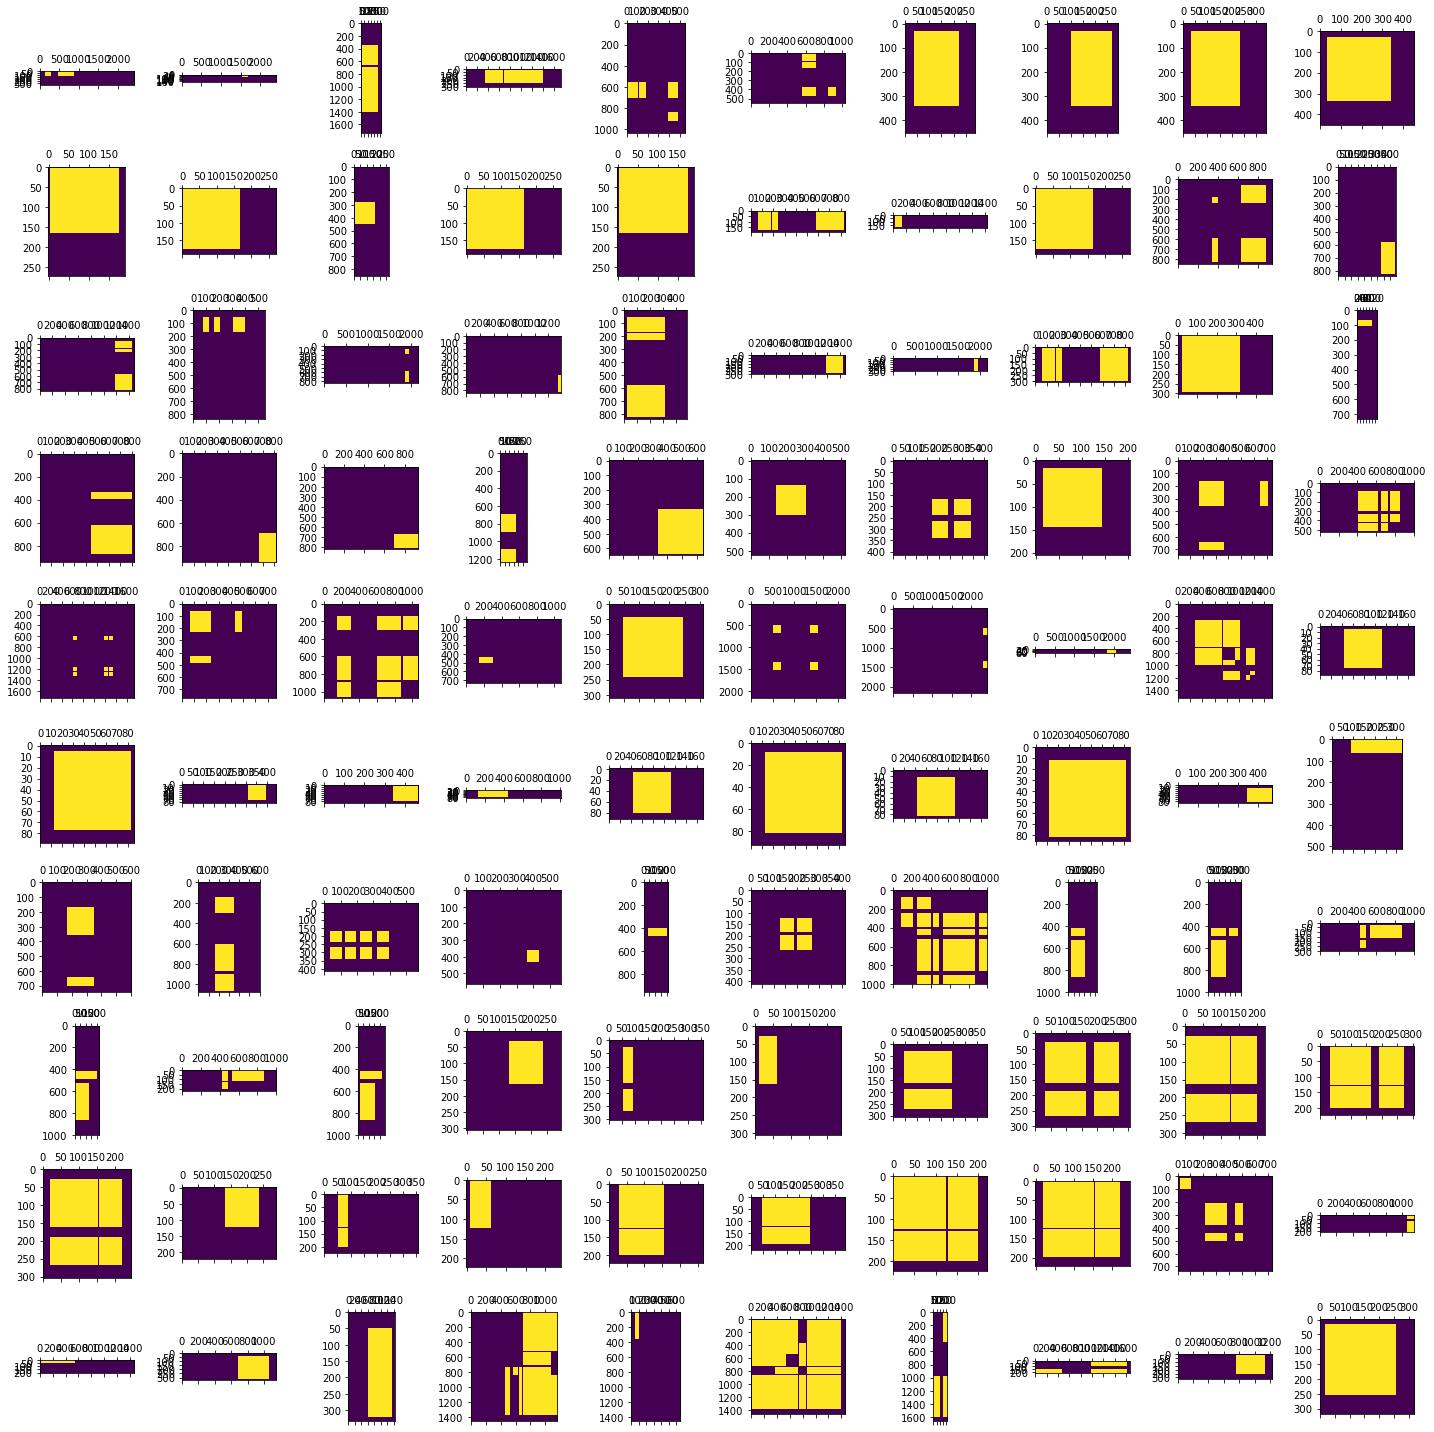

In [86]:
fig, axs = plt.subplots(10,10, figsize=(20, 20))
fig.set_tight_layout(True)
for i, ax in enumerate(axs.flat):
    ax.set_aspect('auto', adjustable='box')
    ax.matshow(site_masks[i])
    